# WordCount

## NLTK, Словоформы

In [1]:
s = '«Карты, деньги, два ствола» культовый фильм Гая Ричи. Эта картина покорила сначала Британию, затем Америку, а потом и весь мир. Никому неизвестный режиссер Гай Ричи, у которого за плечами были только коротметражка «Трудное дело», дешевые рекламные ролики и клипы, создал шедевр на все времена. Это именно тот случай, когда и критики, и зрители в восторге. Здесь очень много черного юмора и насилия, но это и делает фильм таким какой он есть. Хоть он и не стал лидером проката, но собрал множество наград и стал классикой. Но вернемся в прошлое и перенесемся за океан. В 1994 году вышел фильм «Криминальное чтиво» Квентина Тарантина. По слухам как-то его спросили — «Квентин, вам не кажется, что вы не сняли ничего лучше Криминального чтива?», на что он ответил — «А кто снял?». Нет, не снял, но снимет через четыре года. Молодой и талантливый режиссер Гай Ричи, заставит заговорить о себе весь мир. Со своей картиной «Карты, деньги, два ствола», не только встанет на один уровень со своим голливудским коллегой Квентином Тарантино и его фильмом «Криминальное чтиво», но и превзойдет его. Хотя, здесь достаточно трудно утверждать чей фильм лучше, а чей хуже оба этих фильма гениальны, но свое предпочтение я отдам Гаю Ричи. А теперь после того, как я похвалила режиссера, можно перейти к самой картине. О ней только и можно сказать что она невероятна. Именно такой и видится криминальный мир Лондона. Здесь есть все составляющие для хорошего кино. Все актеры подобраны идеально и стоят на своем месте. Стоит ли говорить, что после этого фильма Джейсон Стэйтем проснулся звездой. Кроме потрясающей режиссерской работы, здесь ещё и отличный сценарий, написанный так же Гаем Ричи. Все диалоги настолько хороши, что во время просмотра хочется взять бумагу и ручку и записать их. Так же к диалогам подобрано отличное музыкальное сопровождение. С первых минут фильм кажется ничем не примечательным, и думаешь почему же все считают его культовым. Но потом происходит что-то нереальное. Этот фильм настолько притягивает к себе, что оторваться просто невозможно, настолько интересно наблюдать, как сюжетные линии переплетаются между собой. После просмотра «Карты, деньги, два ствола», просто сидишь в оцепенении и думаешь «Черт возьми, что это было? И хочу ещё!» Безусловно Гай Ричи создал культовое кино, которое хочется смотреть и пересматривать.'

In [2]:
# s = ''
# with open('data/winni.txt') as infile:
#     for line in infile:
#         s += line.strip() + ' '
# s=s.replace('- ','') # диалоги с '- '

In [3]:
import nltk
import re
prog = re.compile('[А-Яа-я\-]+')
l1 = prog.findall(s.lower())
d1 = nltk.FreqDist(l1)
print (d1)
print (d1.most_common(10))

<FreqDist with 6793 samples and 39465 outcomes>
[('и', 1703), ('он', 892), ('что', 839), ('не', 798), ('сказал', 771), ('в', 736), ('я', 632), ('а', 616), ('пух', 594), ('на', 458)]


## pymorphy, Леммы без стоп-слов

In [4]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
from nltk.corpus import stopwords
l3 = [morph.parse(token)[0].normal_form for token in l1 if not token in stopwords.words('russian')]
d3 = nltk.FreqDist(l3)
print (d3)
d3.most_common(10)

<FreqDist with 3916 samples and 23009 outcomes>


[('сказать', 963),
 ('пух', 683),
 ('пятачок', 521),
 ('это', 453),
 ('робин', 297),
 ('кристофер', 295),
 ('кролик', 288),
 ('иа', 229),
 ('очень', 208),
 ('тигр', 205)]

In [5]:
print (d3['картина'])
print (d3.freq('картина'))

1
4.3461254291798863e-05


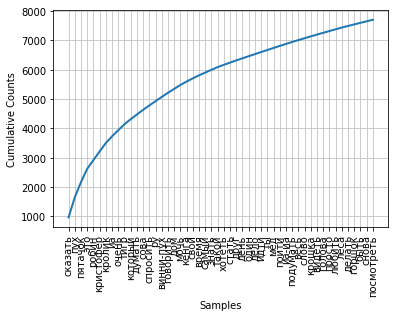

In [6]:
d3.plot (50, cumulative = True)

## Mystem vs pymorphy (Кто знает Гая Ричи)

In [7]:
text = 'Кто знает Гая Ричи'

In [8]:
from pymorphy2 import MorphAnalyzer
m = MorphAnalyzer()
lemmas = [m.parse(word)[0].normal_form for word in text.split()]
print(' '.join(lemmas))

кто знать гай ричать


In [9]:
from pymystem3 import Mystem
m = Mystem()
lemmas = m.lemmatize(text)
print(''.join(lemmas))

кто знать гай ричи



## Биграммы

In [10]:
list(nltk.bigrams(l1))

[('алан', 'александр'),
 ('александр', 'милн'),
 ('милн', 'винни'),
 ('винни', 'пух'),
 ('пух', 'и'),
 ('и', 'все-все-все'),
 ('все-все-все',
  '--------------------------------------------------------------'),
 ('--------------------------------------------------------------', 'б'),
 ('б', 'заходер'),
 ('заходер', 'перевод'),
 ('перевод', '--------------------------------------------------------------'),
 ('--------------------------------------------------------------',
  'пересказ'),
 ('пересказ', 'б'),
 ('б', 'заходера'),
 ('заходера', 'глава'),
 ('глава', 'первая'),
 ('первая', 'в'),
 ('в', 'которой'),
 ('которой', 'мы'),
 ('мы', 'знакомимся'),
 ('знакомимся', 'с'),
 ('с', 'винни-пухом'),
 ('винни-пухом', 'и'),
 ('и', 'несколькими'),
 ('несколькими', 'пчелами'),
 ('пчелами', 'ну'),
 ('ну', 'вот'),
 ('вот', 'перед'),
 ('перед', 'вами'),
 ('вами', 'винни-пух'),
 ('винни-пух', 'как'),
 ('как', 'видите'),
 ('видите', 'он'),
 ('он', 'спускается'),
 ('спускается', 'по'),
 ('по', 'лестни

## Сегментация предложений

In [11]:
text = "Население г. Москва составляет 11.92 млн человек. Это точно? Нет, не точно!"
from nltk.tokenize import sent_tokenize
sents = sent_tokenize(text)
print(sents)
len(sents)

['Население г. Москва составляет 11.92 млн человек.', 'Это точно?', 'Нет, не точно!']


3

## Распределение длин слов в тексте

In [12]:
fdist = nltk.FreqDist(len(w) for w in l1)  
print(fdist)  
print (fdist.most_common(5))
print (fdist.freq(fdist.max()))

<FreqDist with 27 samples and 39465 outcomes>
[(3, 6183), (5, 5275), (6, 5151), (2, 4955), (1, 4517)]
0.15667046750285063


## Превращаем в NLTK-текст (спецфункции)

In [13]:
f=open('data/winni.txt')
raw=f.read()
tokens = nltk.word_tokenize(raw)
text = nltk.Text(tokens)

In [14]:
text = nltk.Text(l1)

In [15]:
print(text)

<Text: алан александр милн винни пух и все-все-все --------------------------------------------------------------...>


In [16]:
text.concordance("сова")

Displaying 25 of 124 matches:
 что именно там в дремучем лесу жила сова а если кто-нибудь что-нибудь о чем-н
л медвежонок про себя то это конечно сова или я не винни-пух сказал он а яон д
бавил винни-пух значит все в порядке сова жила в великолепном замке каштаны да
й один во всем лесу умел писать даже сова хотя она была очень-очень умная и ум
чика и крикнул очень громким голосом сова открывай пришел медведь дверь открыл
вай пришел медведь дверь открылась и сова выглянула наружу здравствуй пух сказ
алуйста как мне его найти ну сказала сова обычная процедура в таких случаях ни
а собиралась сказать я не чихала нет сова ты чихнула прости пожалуйста пух но 
печать очень громко и внятно сказала сова дай в газету объявление и пообещай н
 одним глоточком меду ну вот сказала сова мы значит напишем наше объявление и 
нь стараться слушать то что говорила сова а сова говорила и говорила какие-то 
аться слушать то что говорила сова а сова говорила и говорила какие-то ужасно 
о да то нет на все что

In [17]:
text.similar('пошел')

отправился побежал подошел вернулся поплелся повернулся помчался что
но то его так еще был ведь наверно я вышел поднялся лез


In [18]:
text.common_contexts(["ты", "я"])

а_думал нет_не пух_не что_придумал разве_не это_очень что_говорил
что_должен что_думал это_пятачок это_сказал это_не бы_не это_сам а_не
что_не конечно_прав а_как а_сегодня что_хотел


In [19]:
text.collocations(30)

кристофер робин; сказал пух; потому что; кристофера робина; может
быть; сказал кролик; как раз; сказала сова; про себя; кристоферу
робину; сказал пятачок; сказала кенга; сказал кристофер; тем временем;
доброе утро; кристофером робином; северный полюс; как будто; всего
хорошего; днем рождения; всех сил; изо всех; два раза; хочу сказать;
маленькое существо; рыбий жир; день рождения; последнее время; дорогой
мой; как следует


In [20]:
# from nltk.book import *
# text1.concordance("monstrous")

In [21]:
#V = set(text1)
long_words = [w for w in l1 if len(w) > 10]
sorted(long_words)

['--------------------------------------------------------------',
 '--------------------------------------------------------------',
 'ай-ай-ай-ай-ай',
 'ай-да-медведем',
 'аплодировать',
 'аплодисментам',
 'атмосферные',
 'безвыходное',
 'безвыходном',
 'безнадежным',
 'безоблачном',
 'безопасности',
 'безразлично',
 'белой-белой',
 'беспокоиться',
 'беспокоиться',
 'бессмысленной',
 'бестолковое',
 'бестолковый',
 'благодарности',
 'благородный',
 'большой-пребольшой',
 'большой-пребольшой',
 'большом-пребольшом',
 'большом-пребольшом',
 'бум-бум-бум',
 'бум-бум-бум',
 'бутербродов',
 'бутербродов',
 'буфетупроверить',
 'вверхбросаются',
 'вглядываясь',
 'вдохновенно',
 'вдругсовсем-совсем',
 'великодушно',
 'великодушно',
 'великодушно',
 'великодушный',
 'великолепном',
 'величественно',
 'взволновался',
 'взволновался',
 'взволнованно',
 'взволнованно',
 'взволнованно',
 'взволнованно',
 'взволнованно',
 'взволнованный',
 'взволнованный',
 'винни-пухом',
 'винни-пухом',
 'винни-п

In [22]:
#l1.collocations()

## Корпуса

In [23]:
from nltk.corpus import gutenberg
for fileid in gutenberg.fileids():
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    print(num_words, num_sents, round(num_words/num_sents), fileid)

192427 7752 25 austen-emma.txt
98171 3747 26 austen-persuasion.txt
141576 4999 28 austen-sense.txt
1010654 30103 34 bible-kjv.txt
8354 438 19 blake-poems.txt
55563 2863 19 bryant-stories.txt
18963 1054 18 burgess-busterbrown.txt
34110 1703 20 carroll-alice.txt
96996 4779 20 chesterton-ball.txt
86063 3806 23 chesterton-brown.txt
69213 3742 18 chesterton-thursday.txt
210663 10230 21 edgeworth-parents.txt
260819 10059 26 melville-moby_dick.txt
96825 1851 52 milton-paradise.txt
25833 2163 12 shakespeare-caesar.txt
37360 3106 12 shakespeare-hamlet.txt
23140 1907 12 shakespeare-macbeth.txt
154883 4250 36 whitman-leaves.txt


In [24]:
from nltk.corpus import brown
genre_word = [(genre, word) 
              for genre in ['news', 'romance'] 
              for word in brown.words(categories=genre)] 
print (len(genre_word))
print (genre_word[:4])
print (genre_word[-104:-100])

170576
[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]
[('romance', 'and'), ('romance', 'Freddy'), ('romance', 'in'), ('romance', 'turn')]


In [25]:
cfd = nltk.ConditionalFreqDist(genre_word)
print (cfd.conditions())
print(cfd['news'])
print(cfd['romance'])
print (cfd['romance']['president'])
print (cfd['news']['president'])

['news', 'romance']
<FreqDist with 14394 samples and 100554 outcomes>
<FreqDist with 8452 samples and 70022 outcomes>
9
53


## Свой корпус

In [26]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'data2/' 
wordlists = PlaintextCorpusReader(corpus_root, '.*')
print (wordlists.fileids())


['Airedale.txt', 'American.txt', 'Bedlington.txt', 'Bull.txt', 'IrishSoft.txt', 'JackRussell.txt', 'Pitbull.txt', 'Welsh.txt', 'Yorkshire.txt', 'australian.txt', 'fox.txt', 'hoffungs.txt', 'irish.txt', 'scottish.txt', 'white.txt']


In [27]:
len(wordlists.raw('fox.txt'))

4603

In [28]:
print (wordlists.raw('fox.txt'))

Фокстерьер — порода собак. FCI выделяет 2 отдельные породы фокстерьеров:
История[править | править вики-текст]
Когда Цезарь впервые вступил на землю Альбиона, римляне увидели небольших собак, которые добывали дичь, преследуя её в норах. Первое же описание фокстерьеров было дано в XVI веке Джоном Кисом — врачом из Кембриджского университета.

Позже для улучшения породы в племенной работе использовались таксы, английские хаунды, а немного спустя — бигли и фоксхаунды. Стандарт породы впервые был официально опубликован в 1876 году. Этот год можно считать официальным годом создания породы фокстерьер.

Разновидности породы[править | править вики-текст]
Существуют 2 разновидности фокстерьеров — жесткошёрстный и гладкошёрстный. Жесткошёрстного фокстерьера вывели в конце XIX века и в его венах течёт кровь жесткошёрстного чёрно-подпалого терьера. Эта собака была предназначена для охоты на лисиц.

Предками же гладкошёрстного терьера были гладкошёрстный чёрно-подпалый терьер, бигль, бульдог и грей

In [29]:
for fileid in wordlists.fileids():
    num_words = len(wordlists.words(fileid))
    num_sents = len(wordlists.sents(fileid))
    print(num_words, num_sents, 
          round(num_words/num_sents), fileid)

1872 111 17 Airedale.txt
1779 117 15 American.txt
505 24 21 Bedlington.txt
877 49 18 Bull.txt
581 32 18 IrishSoft.txt
1460 87 17 JackRussell.txt
849 65 13 Pitbull.txt
538 22 24 Welsh.txt
3745 208 18 Yorkshire.txt
487 24 20 australian.txt
784 44 18 fox.txt
678 63 11 hoffungs.txt
723 34 21 irish.txt
1091 89 12 scottish.txt
445 24 19 white.txt


In [30]:
import re
prog = re.compile('[А-Яа-я\-]+')
prog.findall("Слова? Да, больше слов? Что-то.")

['Слова', 'Да', 'больше', 'слов', 'Что-то']

In [31]:
nltk.word_tokenize("Слова? Да, больше слов? Что-то.")

['Слова', '?', 'Да', ',', 'больше', 'слов', '?', 'Что-то', '.']

In [2]:
from pymorphy2 import MorphAnalyzer
m = MorphAnalyzer()
m.parse("осени")[0]

Parse(word='осени', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='осень', score=0.3, methods_stack=((<DictionaryAnalyzer>, 'осени', 13, 1),))